## Mission 4

### 4-1. pandasでのデータ可視化

Pythonには`Matplotlib`という有名なグラフ描画用のライブラリが存在します。<br>
またpandasには、`Matplotlib`のラッパーで`plot()`という関数が存在します。<br>
`plot()`関数を用いることで比較的簡単にDataFrame形式のデータを可視化できます。
`plot()`関数では大まかに下記の種類のグラフの作成が可能です。

pandas入門道場では、よく用いられる`折れ線グラフ`、`棒グラフ`、`ヒストグラム`を紹介します。<br>
さらに深く学びたい場合は、Gymのpandas道場の中に`データの可視化`というMissionがあるのでそちらもご利用ください。

【plot()で作成可能なグラフ一覧】

- 折れ線グラフ
- 棒グラフ
- ヒストグラム
- 箱ひげ図
- カーネル密度推定
- 面グラフ
- 散布図
- etc...

今回、説明の際に用いるデータセットはiris（アヤメ）のデータセットを用います。<br>
機械学習を学ぶ上でよく使われるデータセットなので、今回を機にどんなデータなのかを頭に入れておきましょう。<br>
irisのデータは`scikit-learn`というライブラリに存在します。
その中の`load_iris`関数を用いてデータをロードし、DataFrame形式にて読み込みます。
```
In [1]: import pandas as pd
        from sklearn.datasets import load_iris
        iris = load_iris()
        df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
        df_iris['target'] = iris.target
        df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
        df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
        df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"
```
`load_iris`関数からロードしてきた場合は、花の種類を数値として保持しています。
花名が数値のままでは分かりにくいので、数字と花名をlocを用いて置き換えています。<br>
irisデータの概要を`head`を用いて確認しましょう。
```
In [2]: df_iris.head()

Out[2]:        sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
            0    5.1                   3.5                  1.4                    0.2   setosa
            1    4.9                   3.0                  1.4                    0.2   setosa
            2    4.7                   3.2                  1.3                    0.2   setosa
            3    4.6                   3.1                  1.5                    0.2   setosa
            4    5.0                   3.6                  1.4                    0.2   setosa
```
また花の種類ごとの画像とデータセット詳細も記載しておきます。
列名に含まれている`(cm)`は半角括弧を含んでいるので、列名指定を行う際は注意しましょう。

【irisデータセットの花画像】

![iris花画像](004-00.png)

【irisのデータセット詳細】

- 全データ:150行、5列
- sepal length (cm):がく片の長さ
- sepal width (cm):幅の長さ
- petal length (cm):花弁の長さ
- petal width (cm):幅の長さ
- target:花の種類（setosa,versicolor,virginica）

【pandasを使っての折れ線グラフ作成】

まず折れ線グラフについてです。<br>
折れ線グラフをプロットするには、SeriesまたはDataFrameのデータに対して、`plot()`を使用します。
また、グラフを表示するためにグラフ描画ライブラリ`Matplotlib`から`pyplot`を別名`plt`としてインポートします。<br>
irisのデータを折れ線グラフとしてプロットします。
```
In [3]: import matplotlib.pyplot as plt
        df_iris.plot()
        plt.show() 
```
![iris折れ線](004-01.png)

`plot()`に対しての引数を何も与えないと上記のようなグラフが作成されます。<br>
末尾の`plt.show()`は、「今からプロットしたグラフを表示します」という意味のおまじないとして認識しましょう。

サイズを変更をする際には、引数`figsize`にグラフのサイズを`tuple型`で渡します。
サイズの単位は`dpi`となっており、(`横幅,縦幅`)を指定します。
少しサイズを大きくしてグラフをプロットします。
```
In [4]: import matplotlib.pyplot as plt
        df_iris.plot(figsize=(10,5))
        plt.show() 
```
![iris折れ線size](004-02.png)

凡例の表示を無効にするには、引数`legend`に`False`を指定します。
引数`subplots`を`True`にすると各列が別々のサブプロットにプロットされます。
```
In [5]: import matplotlib.pyplot as plt
        df_iris.plot(legend=False,subplots=True)
        plt.show() 
```
![subplotes](004-03.png)

引数`sharey=True`としてサブプロットされている各々のグラフのy軸を共有し、比較しやすくしましょう。
```
In [6]: df_iris.plot(legend=False,subplots=True,sharey=True)
        plt.show() 
```
![subplots-sharey](004_temp.png)

このように`plot()`には様々な引数があるため、データ可視化を行う際の用途に応じて指定しましょう。<br>
`print(df.plot?)`と出力すると引数の一覧が確認することができますが、その中でもよく使う引数を紹介します。

【plot()でよく使う引数】

- 引数`y`: y軸の変数指定
- 引数`x`: x軸の変数指定
- 引数`figsize`: サイズ（tuple型で指定）
- 引数`subplots`: サブプロットをするかどうか（True もしくはFalse）
- 引数`layout`: サブプロットの行数、列数の指定
- 引数`sharex`: x軸の範囲の共有可否（True もしくはFalse）
- 引数`sharey`: y軸の範囲の共有可否（True もしくはFalse）
- 引数`title`: グラフタイトル
- 引数`grid`: グリッドの有無（True もしくはFalse）
- 引数`colormap`: 色（色の名前もしくはカラーコードを指定）
- 引数`legend`: 凡例の有無（True もしくはFalse）
- 引数`alpha`: 透過率（0〜1で1が濃く、0が薄い）

***
### 課 題

1. irisのデータから`setosa`のデータのみで列を別々、かつ、Y軸の範囲を共有にし、折れ線グラフをサブプロットしてください。

2. irisのデータから`sepal length (cm)`のデータのみ、かつ、グリッドと凡例をつけた折れ線グラフをプロットしてください。


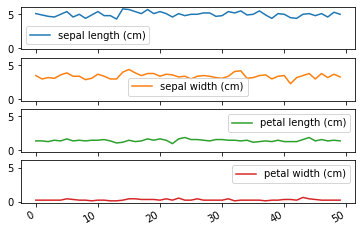

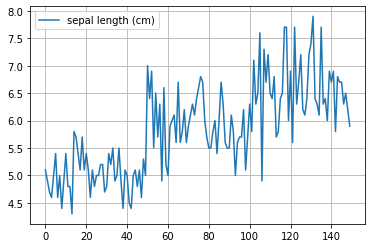

In [1]:
# pandasのインポート
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"

# Q1
df_iris_setosa = df_iris[df_iris['target'] == 'setosa']
df_iris_setosa.plot(subplots=True, sharey=True)
plt.show()

# Q2
df_iris['sepal length (cm)'].plot(grid=True, legend=True)
plt.show()

<br>

### 4-2. pandasを使ってのヒストグラム作成

データ分析の際に、データの頻度や分布を見るためによくヒストグラムを作成します。
データの外れ値なども確認できるため、トップクラスに使われるグラフの一つとなっています。<br>
前回同様にirisのデータを元にヒストグラムをプロットしてみましょう。

まず、irisのデータを読み込みましょう。
```
In [1]: import pandas as pd
        from sklearn.datasets import load_iris
        iris = load_iris()
        df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
        df_iris['target'] = iris.target
        df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
        df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
        df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"
```
ヒストグラムは`pandas.DataFrame.hist`で描画することができます。

irisデータを用いて、`pandas.DataFrame.hist`でヒストグラムでプロットします。<br>
DataFrameの末尾に`.hist()`を付けてプロットします。
```
In [2]: df_iris.hist()
        plt.show()
```
![hist](004-04.png)

グラフのラベル部分が重なっていて少し見辛いですね。<br>
`plt.show()`のおまじないの前に`plt.tight_layout()`と記述するとグラフの重なりがないようにプロットしてくれます。
```
In [3]: df_iris.hist()
        plt.tight_layout()
        plt.show()
```
![hist-tight](004-05.png)

このように、`.hist()`と`plt.show()`に間に`plt.××`という記述をするとグラフを装飾することができます。
`plt.××`には様々な種類がありますが、今回はよく用いるものを紹介します。

【plt.でよく使うグラフ装飾方法】

- `plt.title('グラフタイトル')`:グラフタイトルの追加
- `plt.xlabel('X軸ラベル')`: X軸ラベルの追加
- `plt.ylabel('Y軸ラベル')`: Y軸ラベルの追加
- `plt.xlim(Xの最小値, Xの最大値)`: X軸の表示範囲
- `plt.ylim(Yの最小値, Yの最大値)`: Y軸の表示範囲
- `plt.grid()`: 罫線の追加（`True` もしくは`False`）
- `plt.legend()`: 凡例の追加
- `plt.tight_layout()`: グラフの重なりがないようなプロット

また同様に.`hist`にもプロット時に渡すことができる引数があります。
こちらに関してもよく用いるものを紹介します。

【.histでよく使う引数】

- 引数`ax`: 複数のデータフレームから生成したヒストグラムを重ねて作画する
- 引数`by`: ラベルを元にヒストグラムを作成する
- 引数`grid`: グリッドの有無（`True` もしくは`False`）
- 引数`xlabelsize`: x軸ラベルの文字サイズ
- 引数`xrot`: x軸ラベルの傾き具合（`xrot=90`は、時計回りに90度回転したxラベルを表示します）
- 引数`ylabelsize`: y軸ラベルの文字サイズ
- 引数`yrot`: y軸ラベルの傾き具合（`yrot=90`は、時計回りに90度回転したyラベルを表示します）
- 引数`sharex`: x軸の範囲の共有可否（`True` もしくは`False`）
- 引数`sharey`: y軸の範囲の共有可否（`True` もしくは`False`）
- 引数`figsize`: グラフのサイズ(tuple型で指定)
- 引数`bins`: 基数の数(デフォルトは10)
- 引数`layout`: 複数のヒストグラムのレイアウトを指定
- 引数`edgecolor`: 枠線の色（色の名前もしくはカラーコードを指定）

多くの装飾方法や引数を紹介しました。
これらに関しては覚える必要はなくグラフ作成の際に都度都度調べながら慣れて行きましょう。

また個別のヒストグラムを重ねて、1つのヒストグラムとすることも可能です。<br>
irisのデータの`sepal length (cm)`のヒストグラムを花の種類ごとにプロットし1つのヒストグラムとします。
ヒストグラムの重ねがけするイメージでプロットを行います。<br>
重ねがけをするため、個別にプロットの色を`color`で、透過度を`alpha`で設定しています。<br>
このようにプロットすることで数値だけではなく目で各データの違いに気づくことが可能となります。
```
In [4]: df_iris[df_iris['target']=='setosa']['sepal length (cm)'].hist(color="#823038", alpha=.5)
        df_iris[df_iris['target']=='versicolor']['sepal length (cm)'].hist(color="#E5F77D", alpha=.5)
        df_iris[df_iris['target']=='virginica']['sepal length (cm)'].hist(color="#DEBA6F", alpha=.5)
        plt.legend(['setosa','versicolor','virginica'])
        plt.title('each_target_sepal_length')
        plt.show()
```
![hist重ね](004-06.png)


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"

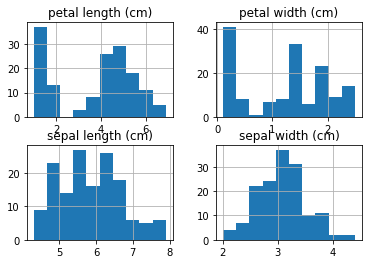

In [3]:
df_iris.hist()
plt.show()

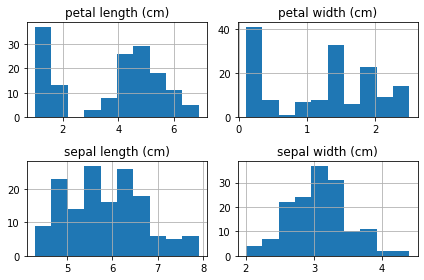

In [4]:
df_iris.hist()
plt.tight_layout()
plt.show()

***
### 課 題

- irisのデータから列を別々、かつ、Y軸の範囲とX軸の範囲をそれぞれ共有可としたヒストグラムをプロットしてください。


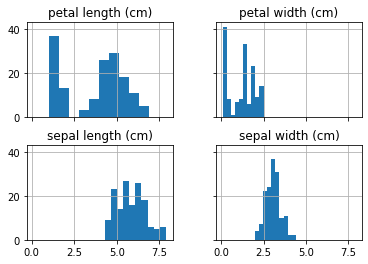

In [5]:
# 解答
# pandasのインポート
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"

# Q1
df_iris.hist(sharex=True, sharey=True)
plt.show()

<br>

### 4-3. pandasを使っての棒グラフ作成

データ分析の際にデータの量の大小の比較を見るためによく棒グラフを作成します。
前回同様にirisのデータを元に棒グラフをプロットしてみましょう。

まず、irisのデータを読み込みましょう。
```
In [1]: import pandas as pd
        from sklearn.datasets import load_iris
        iris = load_iris()
        df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
        df_iris['target'] = iris.target
        df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
        df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
        df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"
```
垂直棒グラフは`plot.bar`、水平棒グラフは`plot.barh`でそれぞれプロットできます。<br>
列`target`別の`sepal length (cm)`の平均を計算し、垂直棒グラフをプロットします。
```
In [2]: import matplotlib.pyplot as plt
        ser = df_iris.groupby('target')['sepal length (cm)'].mean()
        ser.plot.bar()
        plt.show()
```
![bar](004-07.png)

同じ値の水平棒グラフをプロットします。
```
In [3]: ser.plot.barh()
        plt.show()
```
![bar-h](004-08.png)

また、複数列の情報を棒グラフとしてプロットすることも可能です。<br>
irisのデータの先頭５行のデータを垂直棒グラフ、水平棒グラフにてプロットしてみましょう。
```
In [4]: df_iris[:5].plot.bar()
        plt.show()
```
![bar複数](004-09.png)
```
In [5]: df_iris[:5].plot.barh()
        plt.show()
```
![bar-h複数](004-10.png)

引数`stacked=True`とすると積み上げ棒グラフになります。
```
In [6]: df_iris[:5].plot.barh(stacked=True)
        plt.show()
```
![bar積み上げ](004-11.png)

データをどのように可視化すべきか考え、様々な引数を与えてみてグラフをプロットしてみましょう。

***
### 課 題

- irisのデータの末尾5行のデータ、グリッドを有として垂直棒グラフにてプロットしてみましょう。


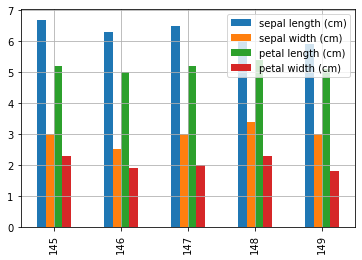

In [7]:
# 解答
# pandasのインポート
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"

# Q1
df_iris_end5 = df_iris[-5:]
df_iris_end5.plot.bar(grid=True)
plt.show()

### 4-4. pandas入門道場最終試験

Mission1からMission4までを通して、データの読み込み、基礎集計、データ加工、データ可視化までの一通りの作業を行ってきました。
さらにpandasへの知識を深めたい場合は、Gymのpandas道場を実施しましょう。<br>
ある程度のpandasの知識をつけることができた方は実際のQuestに挑戦しましょう。
オススメのQuestはスポーツのチケット価格の最適化です。

今まで何度も触れてきた保育園のデータと保育園の詳細データを元に3つの設問に答えてみましょう。<br>
手が止まった時は画面左下のpandas入門道場最終試験というタブを確認し、今までのMissionを振り返ってみましょう。
***
### 課 題

1. 保育園のデータの中で、列`公私区分`と列`土日祝日対応可否`ごとの保育園数、最大合計園児定員、最低合計園児定員、合計園児定員の合計の値を算出し、DataFrame形式でdf1に代入してください。

2. 3歳児の子供を持つ同僚にオススメの幼稚園を1つ考え、施設名を表示してください。
同僚は金額面での縛りはなく、なるべく卒園までに多くの友達を作って欲しいとの条件があります。

3. 列`公私区分`と列`認可区分`ごとの合計園児定員の平均を算出し、`.plot.bar`にて垂直棒グラフをプロットしてください。
通常のplotに加えて、グリッドは有としてください。
